In [1]:
# Essential imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading MNIST DataSet

In [2]:
# loading the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)

In [3]:
# structure of the dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# taking the data and labels from the dataset
X, y = mnist["data"], mnist["target"]

In [5]:
# converting the labels from string to number
y = y.astype(np.uint8)

In [6]:
# separating the train set and test set
# we don't have to shuffle the dataset because the dataset is already shuffled
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Some imports and functions

In [7]:
from sklearn.model_selection import cross_val_predict
from scipy.ndimage import interpolation

# to visualize the digit
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
  plt.axis('off')

##KNN Classifier





In [8]:
# our model
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

In [9]:
# fitting the data into the model
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [10]:
# predicting the values on test set
y_knn_pred = knn_clf.predict(X_test)

In [11]:
# our accuracy (97.14 % accuracy we got)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

Slightly improve the performance of our model (optional)

In [12]:
some_digit = X_train[0]

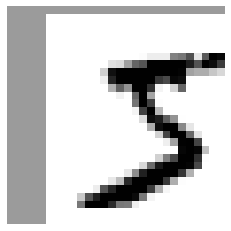

In [13]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
  return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))



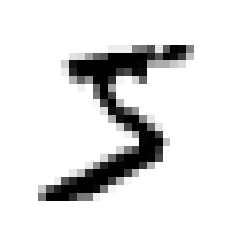

In [14]:
plot_digit(some_digit)

In [15]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
  shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
  X_train_expanded.append(shifted_images)
  y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [16]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [19]:
ambigous_digit = X_test[7855]
knn_clf.predict_proba([ambigous_digit])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

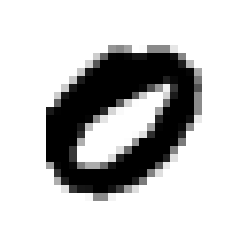

In [20]:
plot_digit(ambigous_digit)

In [21]:
knn_clf.predict([ambigous_digit])

array([0], dtype=uint8)